# 频域滤波

In [1]:
from scipy import signal
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import math


In [3]:
src = cv2.imread('../../datas/p3.jpg')
gray = cv2.imread('../../datas/p3.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [4]:
def low_pass(l, freq_dom, dft) :
    low_spectrum = np.zeros(freq_dom.shape)
    low_spectrum[0:l, 0:l] = np.copy(freq_dom[0:l, 0:l])
    return to_img_domain(low_spectrum, dft)

In [5]:
def high_pass(h, freq_dom, dft) :
    n = freq_dom.shape[0]
    high_spectrum = np.copy(freq_dom)
    high_spectrum[0:n-h, 0:n-h] = np.zeros((n, n))[0:n-h, 0:n-h]
    return to_img_domain(high_spectrum, dft)

In [33]:
def get_dft_vandermonde(n) :
    x = np.linspace(0, 2*np.pi, n, endpoint=False)
    cos_k = np.arange(1, n//2 + 1, dtype=np.float64)
    sin_k = np.arange(1, n//2 +1, dtype=np.float64)
    dft = np.zeros((n,n))
    print(dft.shape)
    print(cos_k.shape,sin_k.shape)
    print(dft[:, 1::2].shape)
    dft[:, ::2] = np.cos(cos_k*x[:, np.newaxis])
    dft[:, 1::2] = np.sin(sin_k*x[:, np.newaxis])
    return dft

In [27]:
def to_freq_domain(img, dft) :
    n = img.shape[0]
    freq_dom = np.zeros((n, n))
    dft_inv = np.linalg.inv(dft)
    for i in range(n) :
        freq_dom[i] = dft_inv.dot(img[i].T).T
    for i in range(n) :
        freq_dom[:, i] = dft_inv.dot(freq_dom[:, i])
    return freq_dom

In [28]:
def to_img_domain(freq_dom, dft) :
    n = freq_dom.shape[0]
    img_dom = np.zeros((n, n))
    for i in range(n) :
        img_dom[i] = dft.dot(freq_dom[i].T).T
    for i in range(n) :
        img_dom[:, i] = dft.dot(img_dom[:, i])
    return img_dom

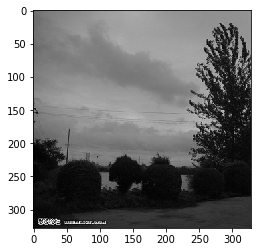

In [29]:
temp = gray[:-1,:-1]
low_dim = min(temp.shape[0],temp.shape[1])
image = temp[:low_dim,:low_dim]
plt.imshow(image,'gray')

(328, 328)
(164,) (164,)
(328, 164)


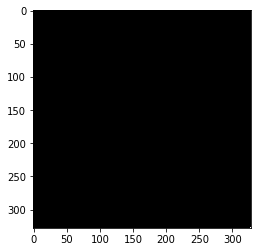

In [34]:
dft = get_dft_vandermonde(image.shape[0])
freq_domain = to_freq_domain(image, dft)
plt.imshow(freq_domain, cmap="gray")

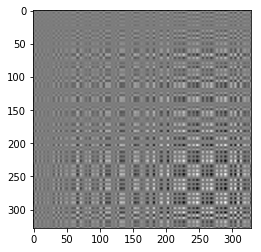

In [36]:
low_passed = low_pass(image.shape[0]//3, freq_domain, dft)
plt.imshow(low_passed,'gray')

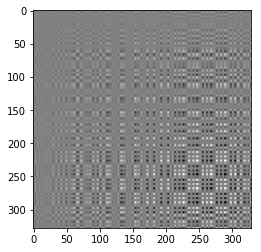

In [37]:
high_passed = high_pass(2*image.shape[0]//3, freq_domain, dft)
plt.imshow(high_passed,'gray')